# Проект: Исследование стартапов

- Автор: Дарья
- Дата: 22.12.2024

## Задачи и цель проекта 


Подготовить качественный датасет, проверить данные и выявить ключевые показатели, влияющие на успешные сделки покупки стартапов, чтобы помочь компании разработать стратегию для выхода на инвестиционный рынок.


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка
### 1.1. Вывод общей информации, исправление названия столбцов

- Для начала импортируем все необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from phik import phik_matrix

In [2]:
pd.set_option('display.max_columns', None) # чтобы видеть все столбцы

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* degrees.csv
* education.csv
* fund.csv
* investment.csv
* people.csv

Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.



**Для проекта нам предоставлено 7 датасетов**

---

1. **Датасет `acquisition`** cодержит информацию о покупках одними компаниями других компаний
- `id` идентификатор покупки
- `acquiring_company_id` идентификатор покупающей компании.
- `acquired_company_id` идентификатор покупаемой компании
- `term_code` варианты расчёта
- `price_amount` сумма сделки
- `acquired_at` дата сделки

Загружаем его 

In [3]:
df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')

df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


- **Датафрейм `df_acquisition` содержит 9407 строк и 6 столбцов**

В `term_code` хранятся строковые данные, поэтому приводим их к нижнему регистру, чтобы не упустить возможные дубликаты

In [4]:
df_acquisition['term_code'] = df_acquisition['term_code'].str.lower()

In [5]:
df_acquisition.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

- названия столбцов соотвествуют стилю snake_case

In [6]:
print(f'''Количество полных дубликатов
{df_acquisition.duplicated().sum()}''')

Количество полных дубликатов
0


- полные дубликаты строк отсутствуют

In [7]:
print(f'''Процент пропусков в столбцах датафрейма:
{round(df_acquisition.isnull().mean().sort_values(ascending=False) * 100, 2)}''')

Процент пропусков в столбцах датафрейма:
term_code               80.54
acquired_at              0.31
id                       0.00
acquiring_company_id     0.00
acquired_company_id      0.00
price_amount             0.00
dtype: float64


- пропуски присутствуют в `term_code`(~81%) и в `acquired_at`(0.3%)

In [8]:
# выводим случайные 10 строк из датафрейма
df_acquisition.sample(n=10)

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
5251,5767,3316,15525,NaN,0,2011-07-07
3920,4361,355,62612,NaN,0,1995-12-21
3694,4130,32951,40829,NaN,485000000,2010-11-17
9049,10132,85,16938,NaN,0,2010-06-09
7655,8540,3246,23960,NaN,0,2013-04-22
2227,2544,35042,17459,cash_and_stock,4000000,2009-11-01
3412,3835,56970,47111,cash,0,2010-08-01
4122,4565,37796,63660,cash_and_stock,20000000,2010-12-09
7366,8204,163437,25176,NaN,0,2013-01-29
6677,7414,43576,84053,NaN,0,2012-07-18


- названия столбцов соотвествуют стилю snake_case
- полные дубликаты строк отсутствуют
- пропуски присутствуют в столбцах `term_code` и  `acquired_at`

---

2. **Датасет `company_and_rounds`** cодержит информацию о компаниях и раундах финансирования
- `company ID` идентификатор компании
- `name` название компании
- `category code` категория области деятельности компании
- `status`статус компании
- `founded at` дата инвестирования
- `closed at` дата закрытия компании
- `domain` официальный сайт компании
- `network username` ник компании в сети
- `country code` код страны компании
- `investment rounds` число инвестиционных раундов
- `funding rounds` число раундов финансирования
- `funding total` сумма финансирования
- `milestones` вехи финансирования
- `funding round id` идентификатор этапа финансирования
- `company id` идентификатор компании
- `funded at` дата финансирования
- `funding round type` тип финансирования
- `raised amount` сумма финансирования
- `pre money valuation` предварительная денежная оценка
- `participants` число участников
- `is first round` является ли раунд первым
- `is last round` является ли раунд последним

In [9]:
company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')

company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

- **Датафрейм `company_and_rounds` состоит из 217 774 строк и 22 столбцов**

In [10]:
company_and_rounds.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

- названия столбцов следует привести к типу snake_case. Можно заметить, что в датасете присутствуют очень похожие столбцы `company  ID` и `company  id` c разным количеством данных. Чтобы нам было удобнее обращаться к ним после преобразования к snake_case, заранее переименуем один столбец 

In [11]:
company_and_rounds = company_and_rounds.rename(columns={'company  id': 'company_id_2'})

In [12]:
company_and_rounds.columns = company_and_rounds.columns.str.lower().str.replace('  ', '_')
company_and_rounds.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_2', 'funded_at', 'funding_round_type',
       'raised_amount', 'pre_money_valuation', 'participants',
       'is_first_round', 'is_last_round'],
      dtype='object')

Чтобы избавиться от дубликатов - приводим значения в столбцах типа object к нижнему регистру и избавляемся от лишних пробелов в начале и в конце строки

In [13]:
object_list = ['name', 'category_code', 'status',
       'domain', 'network_username', 'country_code',
       'funding_round_type']
for value in object_list:
    company_and_rounds[value] = company_and_rounds[value].str.lower().str.strip() 

In [14]:
print(f'''Количество полных дубликатов
{company_and_rounds.duplicated().sum()}''')

Количество полных дубликатов
0


- Полные дубликаты отсутсвуют

In [15]:
print(f'''Процент пропусков в столбцах датафрейма:
{round(company_and_rounds.isnull().mean().sort_values(ascending=False) * 100, 2)}''')


Процент пропусков в столбцах датафрейма:
closed_at              98.42
funded_at              75.81
is_last_round          75.70
is_first_round         75.70
participants           75.70
pre_money_valuation    75.70
raised_amount          75.70
funding_round_type     75.70
funding_round_id       75.70
company_id_2           75.70
network_username       56.13
country_code           50.13
founded_at             49.51
category_code          33.93
domain                 32.43
company_id              0.14
milestones              0.14
name                    0.14
funding_rounds          0.14
investment_rounds       0.14
status                  0.14
funding_total           0.14
dtype: float64


- Пропуски присутствуют во всех столбцах, а особенно их много в столбцах, которые в датасете идут после company_id_2. Есть предположение, что это информация, которая привязана именно к данным company_id_2

In [16]:
# выводим случайные 10 строк из датафрейма
company_and_rounds.sample(n=10)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
21025,155916.0,"hoverink, inc",cleantech,operating,2012-01-31,NaN,NaN,NaN,usa,0.0,1.0,220000.0,1.0,29435.0,155916.0,2012-03-20,series-b,220000.0,0.0,0.0,1.0,1.0
3596,12036.0,carma,transportation,operating,2007-03-01,NaN,car.ma,NaN,irl,0.0,3.0,10100000.0,2.0,31723.0,12036.0,2007-03-01,series-a,2000000.0,0.0,1.0,0.0,1.0
177894,50365.0,lyfft,transportation,operating,2012-05-15,NaN,lyfft.com,NaN,usa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201019,71131.0,sourcecorp,consulting,operating,NaN,NaN,sourcecorp.com,NaN,usa,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96071,233487.0,brocde,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85104,222682.0,haystack media,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149628,28332.0,chan & partners consulting group,NaN,operating,NaN,NaN,cpcgonline.com,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191207,62026.0,amteva technologies,NaN,acquired,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95407,232866.0,sortiq,NaN,operating,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
195452,65955.0,inoveon,biotech,acquired,NaN,NaN,inoveon.com,NaN,usa,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- полные дубликаты отсутствуют
- названия столбцов приведены к стилю snake_case
- требуется анализ пропусков

---

3. **Датасет `fund`** содержит информацию о фондах
- `id` идентификатор компании
- `name` название фонда
- `category_code` категория области деятельности компании
- `founded_at` дата создания фонда
- `domain` сайт фонда
- `network_username` ник фонда в сети
- `country_code` код страны фонда
- `investment_rounds` число инвестиционных раундов
- `invested_companies` число профинансированных компаний
- `milestones` вехи финансирования

In [17]:
df_fund = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')

df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  11652 non-null  int64 
 1   name                11650 non-null  object
 2   founded_at          4605 non-null   object
 3   domain              7362 non-null   object
 4   network_username    2149 non-null   object
 5   country_code        7053 non-null   object
 6   investment_rounds   11652 non-null  int64 
 7   invested_companies  11652 non-null  int64 
 8   milestones          11652 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 819.4+ KB


- **Датафрейм `df_fund` состоит из 11 652 строк и 9 столбцов**

In [18]:
df_fund.columns

Index(['id', 'name', 'founded_at', 'domain', 'network_username',
       'country_code', 'investment_rounds', 'invested_companies',
       'milestones'],
      dtype='object')

- названия столбцов соотвествуют стилю snake_case

приведем данные в столбцах с текстовыми значениями к нижнему регистру и уберем потенциальные пробелы с двух сторон (столбцы типа object содержащие дату - не трогаем, так как в будущем будем преобразовывать тип данных)

In [19]:
fund_object = ['name', 'domain', 'network_username', 'country_code']
for value in fund_object:
    df_fund[value] = df_fund[value].str.lower().str.strip()

In [20]:
print(f'''Количество полных дубликатов
{df_fund.duplicated().sum()}''')

Количество полных дубликатов
0


- полные дубликаты отсутствуют 

In [21]:
print(f'''Процент пропусков в столбцах датафрейма:
{round(df_fund.isnull().mean().sort_values(ascending=False) * 100, 2)}''')


Процент пропусков в столбцах датафрейма:
network_username      81.56
founded_at            60.48
country_code          39.47
domain                36.82
name                   0.02
id                     0.00
investment_rounds      0.00
invested_companies     0.00
milestones             0.00
dtype: float64


- пропуски присутствуют в столбцах `network_username`, `founded_at`, `country_code`, `domain` и `name`

In [22]:
df_fund.sample(n=10)

,id,name,founded_at,domain,network_username,country_code,investment_rounds,invested_companies,milestones
6970,4294,avlar bioventures,1999-01-01,avlar.com,NaN,gbr,6,5,0
3219,13718,west bend mutual insurance company,NaN,NaN,NaN,NaN,0,0,0
7774,5160,kistefos venture capital,1989-01-01,kistefos.no,NaN,nor,1,1,0
4628,169,baker capital,1995-01-01,bakercapital.com,NaN,usa,11,9,0
8401,5820,private equity investors,NaN,privateequityinvestors.org,NaN,NaN,2,2,0
8924,6395,atlantic ventures,2007-01-01,atlanticventures.com,NaN,che,0,0,0
9873,7591,finlombarda,2013-01-01,finlombarda.it,NaN,ita,0,0,0
10288,8181,ruvento,NaN,ruvento.com,NaN,rus,2,2,0
3668,1422,cormark securities inc.,1981-01-01,cormark.com,NaN,can,2,2,0
7283,4648,hunt ventures,NaN,NaN,NaN,NaN,13,11,0


---

4. **Датасет `investment`** содержит информацию о раундах инвестирования
- `id` идентификатор этапа инвестирования
- `funding_round_id` идентификатор раунда инвестирования
- `company_id` индентификатор компании
- `funding_round_type` тип финансирования
- `fund_id` идентификатор фонда

In [23]:
df_investment = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

df_investment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   id                61403 non-null  int64
 1   funding_round_id  61403 non-null  int64
 2   company_id        61403 non-null  int64
 3   fund_id           61403 non-null  int64
dtypes: int64(4)
memory usage: 1.9 MB


**Датафрейм `df_investment` состоит из 61 403 строк и 4 столбцов**

In [24]:
df_investment.columns

Index(['id', 'funding_round_id', 'company_id', 'fund_id'], dtype='object')

- названия столбцов соответствуют стилю snake_case

In [25]:
print(f'''Количество полных дубликатов
{df_investment.duplicated().sum()}''')

Количество полных дубликатов
0


- полные дубликаты отсутствуют

In [26]:
print(f'''Процент пропусков в столбцах датафрейма:
{round(df_investment.isnull().mean().sort_values(ascending=False) * 100, 2)}''')

Процент пропусков в столбцах датафрейма:
id                  0.0
funding_round_id    0.0
company_id          0.0
fund_id             0.0
dtype: float64


- пропуски отсутствуют 

In [27]:
df_investment.sample(n=10)

,id,funding_round_id,company_id,fund_id
4188,4189,3127,9405,86
53303,53304,41311,151619,6720
10778,10779,7348,27122,1346
25323,25324,16650,31437,5689
21457,21458,14536,25449,4230
46950,46951,34079,189572,6253
15602,15603,10584,38401,2929
41231,41232,29157,154069,4990
39195,39196,27294,1297,520
39563,39564,27625,12068,562


---

5. **Датасет `education`** содержит информацию об образовании сотрудника
- `id` идентификатор записи об образовании
- `person_id` идентификатор работника
- `instituition` название учебного заведения
- `graduated_at` дата получения образования

In [28]:
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')

df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


**Датафрейм `df_education` состоит из 109 610 строк и 4 столбцов**

In [29]:
df_education.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

- названия столбцов соответствуют стилю snake_case

приведем данные в столбце instituition к нижнему регистру для выявления возможных дубликатов

In [30]:
df_education['instituition'] = df_education['instituition'].str.lower().str.strip()

In [31]:
print(f'''Количество полных дубликатов
{df_education.duplicated().sum()}''')


Количество полных дубликатов
0


- полные дубликаты отсутствуют

In [32]:
print(f'''Процент пропусков в столбцах датафрейма:
{round(df_education.isnull().mean().sort_values(ascending=False) * 100, 2)}''')

Процент пропусков в столбцах датафрейма:
graduated_at    47.04
instituition     0.05
id               0.00
person_id        0.00
dtype: float64


- около половины пропусков наблюдается в столбце graduated_at, и 0.05% в столбце instituition

In [33]:
df_education.sample(n=10)

,id,person_id,instituition,graduated_at
57992,57986,214119,the john marshall law school,NaN
76430,76426,43158,albion college,1988-01-01
68953,68951,224913,central connecticut state university,NaN
88124,88121,37208,tsinghua university,NaN
47349,47347,4485,university of oxford,1984-01-01
35957,35953,190213,rensselaer polytechnic institute (rpi),NaN
41179,41175,8535,"indian institute of technology, kanpur",1995-01-01
92437,92436,4150,stanford university graduate school of business,NaN
67527,67525,210259,academia sagrado corazon,1976-01-01
40518,40514,194416,montclair state university,2006-01-01


---

6. **Датасет `people`** содержит информацию о сотрудниках
- `id` идентификатор сотрудника
- `first_name` имя сотрудника
- `last_name` фамилия сотрудника
- `company_id` идентификатор компании
- `network_username` ник в социальных сетях

In [34]:
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')

df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


**Датафрейм `df_people` состоит из 226 709 строк и 5 столбцов**

In [35]:
df_people.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

- названия столбцов соответствуют типу snake_case

приведем данные в столбце `first_name`, `network_username` и `last_name` к нижнему регистру для выявления возможных дубликатов

In [36]:
df_people_object = ['first_name', 'last_name', 'network_username']
for value in df_people_object:
    df_people[value] = df_people[value].str.lower().str.strip()

In [37]:
print(f'''Количество полных дубликатов
{df_people.duplicated().sum()}''')

Количество полных дубликатов
0


- полные дубликаты отсутствуют

In [38]:
print(f'''Процент пропусков в столбцах датафрейма:
{round(df_people.isnull().mean().sort_values(ascending=False) * 100, 2)}''')

Процент пропусков в столбцах датафрейма:
company_id          84.73
network_username    82.86
first_name           0.00
last_name            0.00
id                   0.00
dtype: float64


- пропуски присутствуют в столбце `company_id` и `network_username`

In [39]:
df_people.sample(n=10)

,id,first_name,last_name,company_id,network_username
161773,32426,sharon,pacaldo,22261.0,envysportswear
166197,36794,thomas,tscherning,NaN,innovationup
137711,249859,james,t. ingram,NaN,NaN
17645,121885,claire,roberts,NaN,NaN
170680,41183,andrew,solmssen,NaN,NaN
83376,196111,marcin,stepien,NaN,marcinstepien
215415,8634,anders,lã¶nnqvist,NaN,NaN
189097,59471,bojan,zakaric,NaN,NaN
208080,78604,liis,kask,NaN,NaN
122000,234251,micahel,loustalot,NaN,NaN


---

7. **Датасет `degrees`** содержит информацию о типе образования сотрудника
- `id` - идентификатор записи
- `object_id` - идентификатор сотрудника
- `degree_type` - тип образования
- `subject` - специальность

In [40]:
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


**Датафрейм `df_degrees` состоит из 109 610 строк и 4 столбцов**

In [41]:
df_degrees.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

- названия столбцов соответствуют типу snake_case

приведем данные в столбце `object_id`, `degree_type` и `subject` к нижнему регистру для выявления возможных дубликатов

In [42]:
df_degrees_object = ['object_id', 'degree_type', 'subject']
for value in df_degrees_object:
    df_degrees[value] = df_degrees[value].str.lower().str.strip()

In [43]:
print(f'''Количество полных дубликатов
{df_degrees.duplicated().sum()}''')

Количество полных дубликатов
0


- полные дубликаты отсутствуют

In [44]:
print(f'''Процент пропусков в столбцах датафрейма:
{round(df_degrees.isnull().mean().sort_values(ascending=False) * 100, 2)}''')


Процент пропусков в столбцах датафрейма:
subject        25.83
degree_type    10.23
id              0.00
object_id       0.00
dtype: float64


- пропуски присутствуют в столбце `subject`, `degree_type`

In [45]:
df_degrees.sample(n=10)

,id,object_id,degree_type,subject
78091,78092,p:232415,ba,electronic engineering
7862,7863,p:59812,ms,film
69835,69836,p:205922,ba,NaN
10397,10398,p:74349,ba,computer science
57378,57379,p:163594,master's degree on telecommunica,"leadership, human resources & communication,"
16862,16863,p:114993,ms,strategic marketing
23611,23612,p:822,ms,business
4684,4685,p:45222,bs,archeology
68326,68327,p:224524,phd,chemical engineering
84637,84638,p:238590,NaN,management science; industrial engineering


---

**Вывод**

Были загружены и изучены предоставленные для исследования датасеты
- `df_acquisition`
- `company_and_rounds`
- `df_fund`
- `df_investment`
- `df_education`
- `df_people`
- `df_degrees`
 
Необходима смена типа данных для столбцов, которые хранят значения даты и времени.

### 1.2. Смена типов и анализ пропусков

* Обработайте типы данных в столбцах, которые хранят значения даты и времени, если это необходимо.

* Оцените полноту данных — сделайте предварительный вывод, достаточно ли данных для решения задач проекта.

- Меняем тип данных в столбцах, которые хранят значения даты и времени.

In [46]:
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'], errors='coerce')
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [47]:
date_cols = ['founded_at', 'closed_at', 'funded_at']
for col in date_cols:
    company_and_rounds[col] = pd.to_datetime(company_and_rounds[col], errors='coerce')
company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [48]:
df_fund['founded_at'] = pd.to_datetime(df_fund['founded_at'], errors='coerce')
df_fund.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11652 entries, 0 to 11651
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11652 non-null  int64         
 1   name                11650 non-null  object        
 2   founded_at          4605 non-null   datetime64[ns]
 3   domain              7362 non-null   object        
 4   network_username    2149 non-null   object        
 5   country_code        7053 non-null   object        
 6   investment_rounds   11652 non-null  int64         
 7   invested_companies  11652 non-null  int64         
 8   milestones          11652 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 819.4+ KB


In [49]:
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'], errors='coerce')
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


**Анализ пропусков**

Датасет `df_acquisition`

**`term_code` (~81% пропусков)**

Возможные причины: данные не фиксировались или были утеряны.

- `Столбец не влияет на результаты задач проекта, поэтому пропуски не критичны`

**- `acquired_at` (~0.3% пропусков):**

Возможные причины: дата сделки не была указана

- Дата сделки важна для анализа, однако заполнение пропусков медианным значением может исказить результаты исследования, заменить на значение-индикатор равносильно оставленным пропускам, а удаление означает потерю остальных данных в других столбцах. `Лучше оставить, так как пропуски не помешают анализу`.

Датасет `company_and_rounds`

**company_id_2 (~75.7%)**, **funding_round_id (~75.7%)**, **funded_at (~75.81%)**, **raised_amount (~75.7%)**

Возможные причины: данные относятся только к определённым компаниям и раундам финансирования, а для остальных компаний они не актуальны

- `Необходимо объединить данные из company_id_2 с company_id`, остальные пропуски не получится удалить или заполнить каким-то значениям, так как они все равно будут составлять около 70% данных. Пропуски не должны помешать анализу, так как сам пропуск в данном датасете значит отсутствие информации для определенных компаний, замена пропусков значением индикатором равносильно тому, что мы оставим пропуски.

**closed_at (~98.42%)**

Возможные причины: большинство компаний ещё не завершили свою деятельность, поэтому столбец может содержать пропуски или же часть данных была утеряна

`Можно оставить`, в контексте анализа активных компаний столбец не критичен.

Датасет `df_fund`

**founded_at (~60.5%)**, **network_username (~81.5%)**, **domain (~36.8%)**

Возможные причины: данные могли быть утеряны или быть не полностью собранными

`Можно оставить`, так как в контексте задач проекта они не должны быть задействованы

Датасет `df_education`

**graduated_at (~47%)**

Возможные причины: возможно инфомация о дате завершения учебы не была зафиксирована

`Можно заменить пропуски на "не указано" или оставить их, так как информация не критична`

Датасет `df_people`

**network_username (~70%)**

Возможные причины; не все сотрудники имеют профили в социальных сетях(?) или эта информация не фиксировалась

`Можно проигнорировать этот столбец для задач анализа`.

**company_id (~30%)**

Возможные причины: некоторые сотрудники могли быть не привязаны к определённой компании или часть данных могла быть утеряна или не зафиксирована

`Можно оставить`, так как восполнить данные не получится, а заменить на значение-индикатор равнозначно изначальному варианту

Датасет `df_degrees`

**subject (~25.83%)**, **degree_type (~10.24%)**
Возможные причины: у некоторых сотрудников информация о специальности или уровне образования может быть неизвестна или не фиксировалась.

`Пропуски не критичны для задач проекта`

**Вывод**

В нескольких датасетах наблюдаются значительные пропуски в данных, вызванные либо отсутствием информации, либо спецификой данных. Такие пропуски следует оставить без изменений, так как восполнить их невозможно.

В целом, пропуски не препятствуют выполнению задач проекта.

## Шаг 2. Предобработка данных, предварительное исследование

### 2.1. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. И, например, в результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных, так как большая часть значений встречается в разных датасетах не один, а несколько раз. Этот столбец может быть использован для объединения данных.

* Установите, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — то насколько часто.

* Оцените, можно ли использовать столбцы с именем `network_username` для объединения данных.

----

Цель данного этапа — оценить возможность использования столбца `network_username` для объединения данных из нескольких таблиц. Столбец network_username встречается в датасетах `df_company_and_rounds`, `df_fund` и `df_people`.
Чтобы подтвердить возможность объединения, необходимо ответить на следующие вопросы:

- Сколько уникальных непустых значений `network_username` встречаются в датасетах?
- Насколько часто значения `network_username` совпадают между таблицами?

- Проверяем количество уникальных строк в датасетах, которые содержат столбцы `network_username`

In [50]:
print(f'''Количество уникальных строк без пропусков в company_and_rounds - {company_and_rounds['network_username'].nunique()}''')
print(f'''Количество уникальных строк без пропусков в df_fund - {df_fund['network_username'].nunique()}''')
print(f'''Количество уникальных строк без пропусков в df_people - {df_people['network_username'].nunique()}''')

Количество уникальных строк без пропусков в company_and_rounds - 79374
Количество уникальных строк без пропусков в df_fund - 2091
Количество уникальных строк без пропусков в df_people - 38384


- Используем множества и метод .intersection, чтобы найти пересечения значений `network_username` между таблицами

In [51]:
# Создаем множества уникальных значений network_username в каждом датасете
# Используем .dropna() чтобы из множества удалить значение nan (то есть уникальное значение - пропуск)
set_company_and_rounds = set(company_and_rounds['network_username'].dropna().unique())
set_fund = set(df_fund['network_username'].dropna().unique())
set_people = set(df_people['network_username'].dropna().unique())

# благодаря методу .intersection найдем пересечение множеств 
# это и будет количество совпадений между таблицами
intersection_company_fund = set_company_and_rounds.intersection(set_fund)
intersection_company_people = set_company_and_rounds.intersection(set_people)
intersection_fund_people = set_fund.intersection(set_people)

print(f'''Пересечение между company_and_rounds и fund - {len(set_company_and_rounds.intersection(set_fund))}''')
print(f'''Пересечение между company_and_rounds и people: {len(set_company_and_rounds.intersection(set_people))}''')
print(f'''Пересечение между fund и people: {len(set_fund.intersection(set_people))}''')


Пересечение между company_and_rounds и fund - 87
Пересечение между company_and_rounds и people: 2503
Пересечение между fund и people: 96


- или же в процентах

In [52]:
p_company_fund = len(intersection_company_fund) / len(set_company_and_rounds) * 100
p_company_people = len(intersection_company_people) / len(set_people) * 100
p_fund_people = len(intersection_fund_people) / len(set_fund) * 100

print(f'''Процент пересечений между company_and_rounds и fund: {round(p_company_fund, 2)}%''')
print(f'''Процент пересечений между company_and_rounds и people: {round(p_company_people, 2)}%''')
print(f'''Процент пересечений между fund и people: {round(p_fund_people, 2)}%''')

Процент пересечений между company_and_rounds и fund: 0.11%
Процент пересечений между company_and_rounds и people: 6.52%
Процент пересечений между fund и people: 4.59%


- найдем пересечение всех трех множеств 

In [53]:
intersection_all = set_company_and_rounds.intersection(set_fund, set_people)

print(f'''Пересечение между company_and_rounds, fund и people: {len(intersection_all)}''')

Пересечение между company_and_rounds, fund и people: 10


**Вывод**

Анализ показал, что пересечения значений network_username между таблицами крайне незначительны по сравнению с общим количеством уникальных значений:
Между `company_and_rounds` и `df_fund` совпадает всего `87` значений.
Между `company_and_rounds` и `df_people` - `2503` значения.
Между `df_fund` и `df_people` - `96` значений. 

- `Пересечение между всеми тремя таблицами (company_and_rounds, df_fund, df_people) составляет всего 10 значений`.

Это говорит о том, что network_username **`не подходит`** в качестве ключа для объединения данных. Значения network_username имеют низкую степень совпадений между таблицами и их использование для объединения может привести к значительным потерям информации.

Скорее всего, в network_username, в зависимости от датасета, хранится информация о никнейме компании, фонда, сотрудника


### 2.2. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна. Хотя информация об общем объёме финансирования по раундам присутствует в других датасетах, заказчик считает данные `company_and_rounds.csv` о размере средств наиболее верными.

* Любым удобным способом приведите данные в вид, который позволяет проводить анализ в разрезе отдельных компаний. Можно изменять форму данных, порядок их хранения. Обратите внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

* Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовьте данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию.

---

Вспомним структуру данных в `company_and_rounds`

**Датасет `company_and_rounds`** cодержит информацию о компаниях и раундах финансирования
- `company ID` идентификатор компании
- `name` название компании
- `category code` категория области деятельности компании
- `status`статус компании
- `founded at` дата основания
- `closed at` дата закрытия компании
- `domain` официальный сайт компании
- `network username` ник компании в сети
- `country code` код страны компании
- `investment rounds` число инвестиционных раундов
- `funding rounds` число раундов финансирования
- `funding total` сумма финансирования
- `milestones` вехи финансирования
- `funding round id` идентификатор этапа финансирования
- `company id` идентификатор компании
- `funded at` дата финансирования
- `funding round type` тип финансирования
- `raised amount` сумма финансирования
- `pre money valuation` предварительная денежная оценка
- `participants` число участников
- `is first round` является ли раунд первым
- `is last round` является ли раунд последним

- посмотрим процент пропусков в company_and_rounds

In [54]:
round(company_and_rounds.isnull().sum() / len(company_and_rounds) * 100, 2)

company_id              0.14
name                    0.14
category_code          33.93
status                  0.14
founded_at             49.51
closed_at              98.42
domain                 32.43
network_username       56.13
country_code           50.13
investment_rounds       0.14
funding_rounds          0.14
funding_total           0.14
milestones              0.14
funding_round_id       75.70
company_id_2           75.70
funded_at              75.81
funding_round_type     75.70
raised_amount          75.70
pre_money_valuation    75.70
participants           75.70
is_first_round         75.70
is_last_round          75.70
dtype: float64

In [55]:
company_and_rounds.head()

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,funding_round_id,company_id_2,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,bachelrwetpaint,usa,0.0,3.0,39750000.0,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0.0,0.0,0.0,0.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0.0,0.0,0.0,4.0,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN


- Можно заметить, что значения в `company_id` и `company_id_2` во многом совпадают. Проверим это

In [56]:
# Сравнение значений в двух столбцах
same_values = company_and_rounds['company_id'] == company_and_rounds['company_id_2']
print(f"Количество совпадающих значений: {same_values.sum()}")
print(f"Общее количество строк: {len(company_and_rounds)}")


Количество совпадающих значений: 52626
Общее количество строк: 217774


- Почти все ненулевые значения в 'company_id_2' (всего непустых значений 52928) совпадают с `company_id`, а значит мы можем заполнить пропуски в `company_id` значениями из 'company_id_2'

In [57]:
# Заполняем пропуски в 'company_id' значениями из 'company_id_2'
company_and_rounds['company_id'] = company_and_rounds['company_id'].fillna(company_and_rounds['company_id_2'])

# Проверяем количество пропусков в объединённом столбце
print(f"Количество пропусков в company_id: {company_and_rounds['company_id'].isna().sum()}")


Количество пропусков в company_id: 0


`Разделяем таблицу на две. Одна будет содержать информацию о компаниях, другая — данные по раундам финансирования`

- создаем **датафрейм с данными о компаниях** - **`df_company_and_rounds`**

In [58]:
company_col = ['company_id', 'name', 'category_code', 'status', 'founded_at', 
                   'closed_at', 'domain', 'network_username', 'country_code', 
                   'investment_rounds', 'funding_rounds', 'funding_total', 'milestones']
df_company_and_rounds = company_and_rounds[company_col]
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217774 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [59]:
df_company_and_rounds.isna().sum()

company_id                0
name                    302
category_code         73888
status                  302
founded_at           107818
closed_at            214325
domain                70615
network_username     122240
country_code         109167
investment_rounds       302
funding_rounds          302
funding_total           302
milestones              302
dtype: int64

- Заказчику важно проводить анализ на уровне отдельных компаний, сохраняя возможность расчёта показателей по каждой компании.
Для обеспечения качественного и структурированного анализа мы удалим строки с пропусками в следующих столбцах:
1) `name` — название компании, критически важное для идентификации записей.
2)  `status` — статус компании (активна, закрыта или приобретена), необходимый для оценки жизненного цикла.
3) `investment_rounds` — количество инвестиционных раундов, важный показатель активности компании.
4) `funding_rounds` — количество раундов финансирования, характеризующее динамику привлечения средств.
5) `funding_total` — общая сумма финансирования, отражающая финансовую успешность компании.
6) `milestones` — количество вех компании, показывающее её достижения.

Удаление строк с пропусками в этих столбцах позволит cохранить связность данных и устранить ошибки в дальнейшем анализе.

In [60]:
# создаем список, нужных нам столбцов
list_col = ['name', 'status', 'investment_rounds', 'funding_rounds', 'funding_total']
df_company_and_rounds = df_company_and_rounds.dropna(subset=list_col, how='all')
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


- единственный пропуск в названии компаний мы заменим на значение `неизвестно`

In [61]:
df_company_and_rounds['name'] = df_company_and_rounds['name'].fillna('неизвестно') 
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 217471
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         217472 non-null  float64       
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


- проверим полные дубликаты строк

In [62]:
df_company_and_rounds.duplicated().sum()

20919

В таблице найдено 20919 полных дубликатов строк, удалим их, чтобы в датафрейме были только уникальные записи

In [63]:
df_company_and_rounds = df_company_and_rounds.drop_duplicates()
df_company_and_rounds = df_company_and_rounds.reset_index(drop=True) # сбрасываем старые индексы
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196553 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_id         196553 non-null  float64       
 1   name               196553 non-null  object        
 2   category_code      123186 non-null  object        
 3   status             196553 non-null  object        
 4   founded_at         91227 non-null   datetime64[ns]
 5   closed_at          2620 non-null    datetime64[ns]
 6   domain             126545 non-null  object        
 7   network_username   80591 non-null   object        
 8   country_code       87990 non-null   object        
 9   investment_rounds  196553 non-null  float64       
 10  funding_rounds     196553 non-null  float64       
 11  funding_total      196553 non-null  float64       
 12  milestones         196553 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)


In [64]:
round(df_company_and_rounds.isna().mean() * 100, 2)

company_id            0.00
name                  0.00
category_code        37.33
status                0.00
founded_at           53.59
closed_at            98.67
domain               35.62
network_username     59.00
country_code         55.23
investment_rounds     0.00
funding_rounds        0.00
funding_total         0.00
milestones            0.00
dtype: float64

- Теперь в таблице **196553** записей и **13** столбцов.

- создаем **датафрейм с данными о раундах финансирования** - **`df_funding_rounds`**

In [65]:
funding_columns = ['company_id', 'funding_round_id', 'funded_at', 'funding_round_type', 
                   'raised_amount', 'pre_money_valuation', 'participants', 
                   'is_first_round', 'is_last_round']
# удаляем строки в которых 'funding_round_id' равен NaN
df_funding_rounds = company_and_rounds[funding_columns].dropna(subset=['funding_round_id'])
df_funding_rounds = df_funding_rounds.reset_index(drop=True)
df_funding_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52928 entries, 0 to 52927
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52928 non-null  float64       
 1   funding_round_id     52928 non-null  float64       
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  float64       
 7   is_first_round       52928 non-null  float64       
 8   is_last_round        52928 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 3.6+ MB


- проверим пропуски 

In [66]:
df_funding_rounds.isna().sum()

company_id               0
funding_round_id         0
funded_at              248
funding_round_type       0
raised_amount            0
pre_money_valuation      0
participants             0
is_first_round           0
is_last_round            0
dtype: int64

- пропуски в столбце `funded_at` могут возникнуть в случае, если, к примеру,  дата финансирования была неизвестна или не была зафиксирована. Пропуски не должны нам помешать, поэтому мы их оставляем, так как при удалении мы потеряем информацию из других столбцов

**Вывод**

- В ходе анализа были объединены данные из столбцов company_id и company_id_2 для восполнения недостающей информации.
- Датафрейм df_company_and_rounds равзделен на два датафрейма: `df_company_and_rounds` и `df_funding_rounds`
- В `df_company_and_rounds` были удалены строки с пропусками в критически важных столбцах (`investment_rounds`, `funding_rounds`, `funding_total`, `milestones`) для обеспечения корректности анализа.
- Были удалены пропуски в `name` и `status`, так как строки включали пропуски и в критически важных столбцах.
- Один пропуск в `name` заменён на "неизвестно".

Теперь данные структурированы и готовы к расчёту показателей по каждой компании, что соответствует требованиям заказчика и позволяет анализировать раунды финансирования в разрезе отдельных компаний.

Описание датафрейма `df_company_and_rounds`
- `company_id` - идентификатор компании             
- `name` - название компании
- `category_code` - категория области деятельности компании
- `status` - статус компании
- `founded_at` - дата основания
- `closed_at` - дата закрытия компании
- `domain` - официальный сайт компании
- `network_username` - ник компании в сети
- `country_code` - код страны компании
- `investment_rounds` - число инвестиционных раундов
- `funding_rounds` - число раундов финансирования
- `funding_total` - сумма финансирования
- `milestones` - вехи финансирования

Описание датафрейма `df_funding_rounds`

- `company_id` - идентификатор компании
- `funding_round_id` - идентификатор этапа финансирования
- `funded_at` - дата финансирования
- `funding_round_type` - тип финансирования
- `raised_amount` - сумма финансирования
- `pre_money_valuation` - предварительная денежная оценка
- `participants` - число участников
- `is_first_round` - является ли раунд первым
- `is_last_round` - является ли раунд последним


### 2.3. Раунды финансирования по годам

* Составьте сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:

  * типичный размер средств, выделяемый в рамках одного раунда;
  * общее количество раундов финансирования за этот год.

* Оставьте в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

* На основе получившейся таблицы постройте график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования.

На основе полученных данных ответьте на вопросы:

* В каком году типичный размер собранных в рамках одного раунда средств был максимален?

* Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

---

- Созданим новый столбец, который будет хранить год финансирования

In [67]:
df_funding_rounds['year'] = df_funding_rounds['funded_at'].dt.year

Теперь создаем сводную таблицу, где будем хранить 
- `typical_raised_amount` - типичный размер средств, выделяемый в рамках одного раунда
- `total_rounds` - общее количество раундов финансирования

Вся эта информация должна выводиться для определенного года, в таблице данные оставляем только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

In [68]:
pivot = df_funding_rounds.pivot_table(
    index='year',  # Столбец для группировки (годы)
    values='raised_amount',  # Столбец для расчётов
    aggfunc=['median', 'count']  # Агрегируем медиану и количество
)

# Переименовываем столбцы для удобства
pivot.columns = ['typical_raised_amount', 'total_rounds']
pivot_filtered = pivot[pivot['total_rounds'] > 50]
pivot_filtered.sort_values(by='typical_raised_amount', ascending=False)

,typical_raised_amount,total_rounds
year,,
2005.0,5500000.0,1633
2004.0,5000000.0,291
2006.0,5000000.0,2436
2000.0,4200000.0,125
2002.0,4200000.0,116
2007.0,3973320.0,3279
2008.0,3110000.0,3774
2001.0,3000000.0,96
2003.0,3000000.0,159


- Для последующей визуализации нам понадобится столбик с годами, поэтому мы сбросим индексы

In [69]:
pivot_filtered = pivot_filtered.reset_index() 

**В каком году типичный размер собранных в рамках одного раунда средств был максимален?**

Максимальный типичный размер средств был в 2005 году и составил 5 500 000 руб.


**Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?**

В 2013 году:

- Типичный размер средств составил 1 200 000 руб.
- Общее количество раундов достигло 11042.

Количество раундов в 2013 году было самым высоким, однако типичный размер средств уменьшился по сравнению с предыдущими годами, что говорит о снижении среднего объема инвестиций на один раунд при увеличении их общего числа.

- Построим линейный график

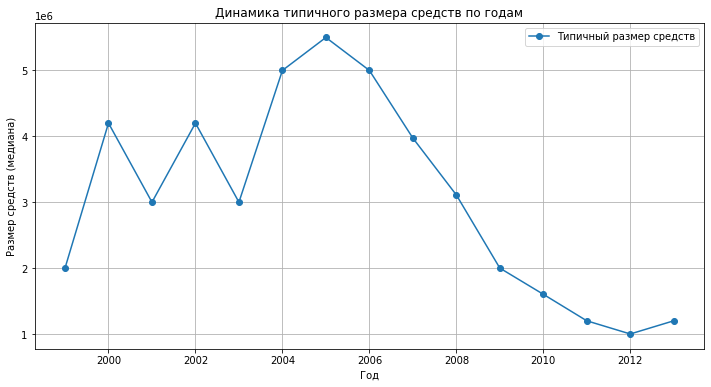

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(pivot_filtered['year'], pivot_filtered['typical_raised_amount'], marker='o', label='Типичный размер средств')
plt.xlabel('Год')
plt.ylabel('Размер средств (медиана)')
plt.title('Динамика типичного размера средств по годам')
plt.grid(True)
plt.legend()
plt.show()

**Вывод**
- Максимальный размер средств наблюдался в 2005 году.

- В 2013 году наблюдался рост количества раундов, но типичный размера средств на один раунд снижался


### 2.4. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

* Оцените, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделите все компании на несколько групп по количеству сотрудников и оцените среднюю долю сотрудников без информации об образовании в каждой из групп.

* Оцените, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

---

- Объединим df_people и df_education, а также проверим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу degrees.
- Чтобы после объединения одинаковым столбцам id не присваивались суффиксы переименуем их

In [71]:
# Переименовываем столбец 'id' в 'id_employee' в df_people
df_people = df_people.rename(columns={'id': 'id_employee'})

In [72]:
# Переименовываем столбец 'id' в 'id_education' в df_education
df_education = df_education.rename(columns={'id': 'id_education'})

In [73]:
# Переименовываем столбец 'id' в 'id_degrees' в df_degrees
df_degrees = df_degrees.rename(columns={'id': 'id_education_d'})

- объединеняем `df_people` и `df_education`, используя тип соединения `left`, чтобы сохранить все строки из df_people, добавив информацию об образовании, если она имеется.

In [74]:
df_people_education = df_people.merge(df_education, left_on='id_employee', right_on='person_id', how='left')

In [75]:
round(df_people_education.isna().mean() * 100, 2)

id_employee          0.00
first_name           0.00
last_name            0.00
company_id          83.27
network_username    81.03
id_education        59.26
person_id           59.26
instituition        59.28
graduated_at        78.45
dtype: float64

- результат предыдущего объединения дополняем информацией из таблицы `df_degrees` на основе столбцов id_education и id_education_d. Тип соединения также left, чтобы сохранить максимальное количество данных.

In [76]:
df_people_education_degrees = df_people_education.merge(df_degrees, left_on='id_education', right_on='id_education_d', how='left')

проверим, что изменилось после присоединения `df_degrees`

In [77]:
round(df_people_education_degrees.isna().mean() * 100, 2)

id_employee          0.00
first_name           0.00
last_name            0.00
company_id          83.27
network_username    81.03
id_education        59.26
person_id           59.26
instituition        59.28
graduated_at        78.45
id_education_d      59.26
object_id           59.26
degree_type         63.43
subject             69.78
dtype: float64

- Основные изменения — это появление дополнительных столбцов, таких как `object_id`, `degree_type`, и `subject`.
- Для выполнения текущего задания ключевым остается столбец `id_education`, который уже присутствовал в данных после объединения таблиц `df_people` и `df_education`.
- Таблица `df_degrees` может быть полезна для углубленного анализа, если потребуется изучать типы образования или предметы обучения, но для базового анализа зависимости между размером компаний и долей сотрудников с информацией об образовании она не является критичной.

Продолжаем работать с объединением `df_people` и `df_education`, так как они уже предоставляют достаточный объем данных для анализа в рамках задания.

In [78]:
df_people_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_employee       267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   float64       
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  float64       
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 20.4+ MB


- Добавим столбец `has_education`, который будет указывать на наличие информации об образовании (True, если информация есть, и False, если нет)

In [79]:
df_people_education['has_education'] = df_people_education['id_education'].notna()

Используя pivot_table, рассчитаем
- `total_employees` - общее количество сотрудников для каждой компании.
- `employees_with_education` - количество сотрудников с информацией об образовании

In [80]:
pivot_table_education = df_people_education.pivot_table(
    index='company_id', 
    values='has_education', 
    aggfunc=['count', 'sum']  # count-общее количество сотрудников, sum- количество сотрудников с образованием
)
pivot_table_education.columns = ['total_employees', 'employees_with_education']
pivot_table_education = pivot_table_education.reset_index() # сбрасываем индексы
pivot_table_education.head()

,company_id,total_employees,employees_with_education
0,1.0,3,2
1,2.0,1,1
2,3.0,5,4
3,4.0,18,17
4,5.0,84,68


In [81]:
pivot_table_education.describe()

,company_id,total_employees,employees_with_education
count,22922.000000,22922.000000,22922.000000
mean,102688.472646,1.953974,1.249367
std,84842.926930,4.087373,3.405692
min,1.000000,1.000000,0.000000
25%,28844.500000,1.000000,0.000000
50%,70878.500000,1.000000,1.000000
75%,174083.500000,2.000000,2.000000
max,286091.000000,376.000000,300.000000


In [81]:
pivot_table_education['total_employees'].max()

np.int64(376)

- максимальное количество сотрудников в одной компании равно 376. Это помогает понять границы данных и определить подходящие диапазоны для группировки компаний.

In [82]:
# Рассчитываем долю сотрудников без образования
pivot_table_education['no_education_share'] = (
    1 - (pivot_table_education['employees_with_education'] / pivot_table_education['total_employees'])
)
pivot_table_education

,company_id,total_employees,employees_with_education,no_education_share
0,1.0,3,2,0.333333
1,2.0,1,1,0.000000
2,3.0,5,4,0.200000
3,4.0,18,17,0.055556
4,5.0,84,68,0.190476
...,...,...,...,...
22917,285897.0,2,2,0.000000
22918,285953.0,1,0,1.000000
22919,285972.0,2,1,0.500000
22920,285996.0,1,1,0.000000


- Сформируем диапазоны для группировки компаний по количеству сотрудников `total_employees`

In [83]:
bins = [0, 10, 50, 100, 250, 300, 350, 400 ]
labels = ['1-10', '11-50', '51-100', '101-150', '151-200', '201-300', '300+']
pivot_table_education['company_size_group'] = pd.cut(pivot_table_education['total_employees'], bins=bins, labels=labels)
pivot_table_education

,company_id,total_employees,employees_with_education,no_education_share,company_size_group
0,1.0,3,2,0.333333,1-10
1,2.0,1,1,0.000000,1-10
2,3.0,5,4,0.200000,1-10
3,4.0,18,17,0.055556,11-50
4,5.0,84,68,0.190476,51-100
...,...,...,...,...,...
22917,285897.0,2,2,0.000000,1-10
22918,285953.0,1,0,1.000000,1-10
22919,285972.0,2,1,0.500000,1-10
22920,285996.0,1,1,0.000000,1-10


In [118]:
# Рассчитываем среднюю долю сотрудников без образования по группам
pivot_table_education.pivot_table(
    index='company_size_group', 
    values='no_education_share', 
    aggfunc='mean',
    observed=True
)

,no_education_share
company_size_group,
1-10,0.459996
11-50,0.297613
51-100,0.182986
101-150,0.166610
300+,0.202128


- Маленькие компании чаще не предоставляют или не имеют информации об образовании сотрудников. Это может быть связано с нехваткой ресурсов на ведение учёта

**Вывод**

- Объединение данных из таблиц df_people, df_education позволило создать единый датафрейм с информацией о сотрудниках, их образовании и типах образования.
- Использование типа соединения left обеспечило сохранение всех записей о сотрудниках, даже если для некоторых из них отсутствуют данные об образовании или специальностях. Это сохраняет связность данных и позволяет использовать объединённую таблицу для дальнейшего анализа полноты сведений об образовании сотрудников в разрезе компаний или других параметров.
- Анализ показал, что доля сотрудников без информации об образовании уменьшается с увеличением размера компании. Это может быть связано с лучшей структурированностью данных в крупных организациях.


## Шаг 3. Исследовательский анализ объединённых таблиц

<big>Приступите к шагу 3 после проверки ревьюера.</big>


### 3.1. Объединение данных

Объедините данные для ответа на вопросы заказчика, которые касаются интересующих его компаний.

В качестве основы для объединённой таблицы возьмите данные из обработанного датасета `company_and_rounds.csv` — выберите только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, и у которых в колонке `status` указано `acquired`.

**Далее работайте только с этими данными.**

---

- выбираем только те компании из датасета **`df_company_and_rounds`**, у которых значения в столбцах `funding_rounds` или `investment_rounds` **больше нуля** и те, у которых в колонке `status` указано **acquired**

In [85]:
new_company_and_rounds = df_company_and_rounds[
    (df_company_and_rounds['funding_rounds'] > 0) | (df_company_and_rounds['investment_rounds'] > 0) | (df_company_and_rounds['status'] == 'acquired')
]
new_company_and_rounds = new_company_and_rounds.reset_index(drop=True)

new_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40747 entries, 0 to 40746
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  float64       
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 4.0

In [86]:
print(f"Доля оставшихся данных: {round((len(new_company_and_rounds) / len(df_company_and_rounds)) * 100, 2)}%")

Доля оставшихся данных: 20.73%


In [87]:
print(f"Компании с funding_rounds > 0: {(new_company_and_rounds['funding_rounds'] > 0).sum()}")
print(f"Компании с investment_rounds > 0: {(new_company_and_rounds['investment_rounds'] > 0).sum()}")
print(f"Компании с status = 'acquired': {(new_company_and_rounds['status'] == 'acquired').sum()}")


Компании с funding_rounds > 0: 31707
Компании с investment_rounds > 0: 2591
Компании с status = 'acquired': 9394


**Вывод**

Датафрейм `df_company_and_rounds` был отфильтрован по условиям

- значения в столбцах `funding_rounds` или `investment_rounds` больше нуля или `status` указан acquired


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

* По предобработанному столбцу `funding_total` оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

* Аномальные значения установите графически, а типичные при помощи таблиц и формул.

* В процессе расчёта значений обратите внимание, например, на показатели, возвращаемые методом `.describe()`, — объясните их. Применимы ли к таким данным обычные способы нахождения типичных значений?

---

In [88]:
print(f'''Статистические показатели столбца funding_total
{new_company_and_rounds['funding_total'].describe()}''')

Статистические показатели столбца funding_total
count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64


e+ сокращает большие числа, означает степень 10 на которую и умножается сокращенное число

- **count** - количество (непустых) значения в столбце = 4.0747 * 10^4 = **40 747**
- **mean** - средний размер общего финансирования для одной компании =  1.013561 * 10^7 = **10 135 610**
- **std** - cтандартное отклонение, характеризующее разброс данных = 5.646436 * 10^7 = **56 464 360**. Такое большое значение указывает на сильный разброс данных, иначе говоря, на наличие выбросов
- **min** - минимальное значение = **0**, то есть компания без финансировая, к примеру
- **25%** - первый квартиль Q1, то есть 25% данных меньше или равны этому значению  0.000000 * 10^6 = **0**. Это указывает на то, что четверть компаний не получила финансирования.
- **50%** медиана или второй квартиль Q2. Означает, что половина данных меньше или равна этому значению 6.000000 * 10^5 = **600 000**. Это типичное значение, которое менее подвержено влиянию выбросов, чем среднее.
- **75%** третий квартиль Q3, 75% данных меньше или равны этому значению 5.650650 * 10^6 = **5 650 650** 
- **max** максимальное значение в столбце = 5.700000 * 10^9 = **5 700 000 000 (5.7 млрд)**, что говорит о компании с самым большим объемом финансирования.

Найдем **IQR** - межквартильный размах. Он показывает, в каком диапазоне лежит средняя половина данных. Иначе говоря от данных отсекается 25% самых маленьких и 25% самых больших значений, оставляя диапазон, в котором находится средняя половина данных (50%). Этот диапазон лежит между первым квартилем (25-й процентиль) и третьим квартилем (75-й процентиль). 

In [89]:
Q1 = new_company_and_rounds['funding_total'].quantile(0.25)
Q3 = new_company_and_rounds['funding_total'].quantile(0.75)
IQR = Q3 - Q1
IQR

np.float64(5650650.0)

средние 50% значений в столбце `funding_total` лежат в диапазоне от 0 млн до 5 650 650 млн.
- широкий диапазон значений указывает на большую вариативность в объемах финансирования у компаний.

Верхняя граница для определения выбросов рассчитывается как **Q3 + 1.5 * IQR**

In [90]:
up_limit = Q3 + 1.5 * IQR
print(f'''Верхняя граница = {up_limit}''')

Верхняя граница = 14126625.0


- Любая компания с общим финансированием больше **14 126 625 млн** считается **выбросом**.

Изучим на гистограмме сумму общего финансирования. Сначала будем анализировать гистограмму отфильстрованную по верхней границе выбросов, так как крайне редкие и аномально высокие суммы финансирования искажают масштаб и мешают оценить основное распределение данных. Удалив их, мы сможем лучше понять, как распределяются типичные суммы финансирования между компаниями.

In [91]:
# Отфильтруем данные без выбросов
filtered_data = new_company_and_rounds[new_company_and_rounds['funding_total'] <= up_limit]

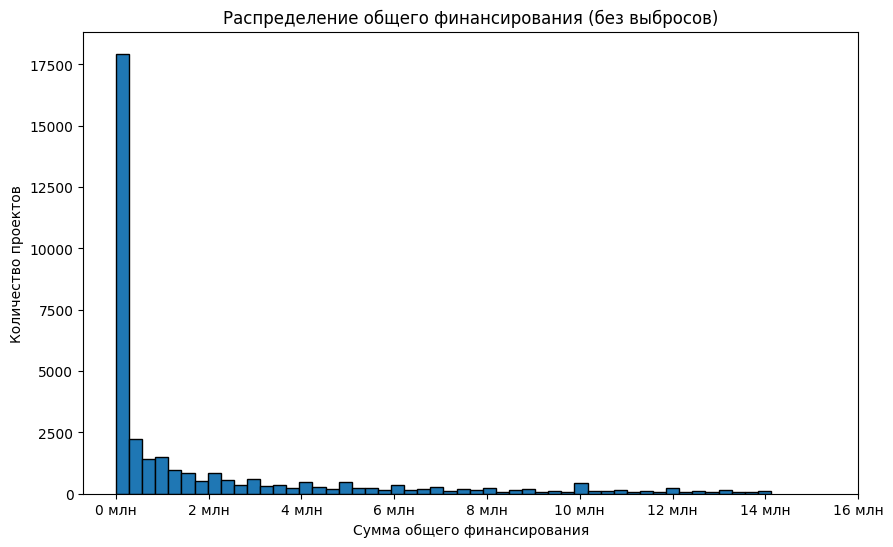

In [92]:
# Построим гистограмму без выбросов
plt.figure(figsize=(10, 6))
filtered_data['funding_total'].plot(kind='hist', bins=50, edgecolor='black')
plt.title("Распределение общего финансирования (без выбросов)")
plt.xlabel("Сумма общего финансирования")
plt.ylabel("Количество проектов")

x_ticks = [0, 2_000_000, 4_000_000, 6_000_000, 8_000_000, 10_000_000, 12_000_000, 14_000_000, 16_000_000]
plt.xticks(ticks=x_ticks, labels=[f'''{int(x/1e6)} млн''' for x in x_ticks])
plt.show()

- На гистограмме видно, что большинство компаний получили финансирование менее 1 млн рублей, при этом пик распределения находится около 0 млн. По мере увеличения суммы финансирования частота резко снижается, что свидетельствует о небольшом числе компаний с крупными инвестициями. Финансирование выше 10 млн рублей встречается крайне редко, что подтверждает сильную асимметрию распределения, смещённого влево. Это указывает на то, что типичные компании получают небольшое финансирование.

- Теперь проанализируем выбросы, построив боксплот

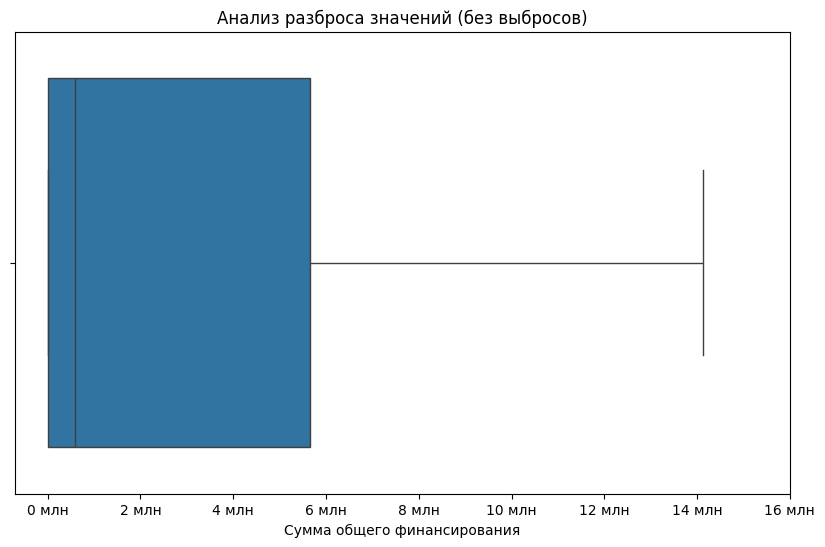

In [93]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=new_company_and_rounds, x='funding_total', showfliers=False)
plt.title('Анализ разброса значений (без выбросов)')
plt.ylabel('')
plt.xlabel('Cумма общего финансирования')
x_ticks = [0, 2_000_000, 4_000_000, 6_000_000, 8_000_000, 10_000_000, 12_000_000, 14_000_000, 16_000_000]
plt.xticks(ticks=x_ticks, labels=[f'''{int(x/1e6)} млн''' for x in x_ticks])
plt.show()


- Основная часть компаний имеет финансирование в пределах от 0 млн до 5.65 млн, при этом медианное значение составляет 0.6 млн (600 000).
- Компании с финансированием более 14.13 млн считаются выбросами

теперь проанализируем выбросы

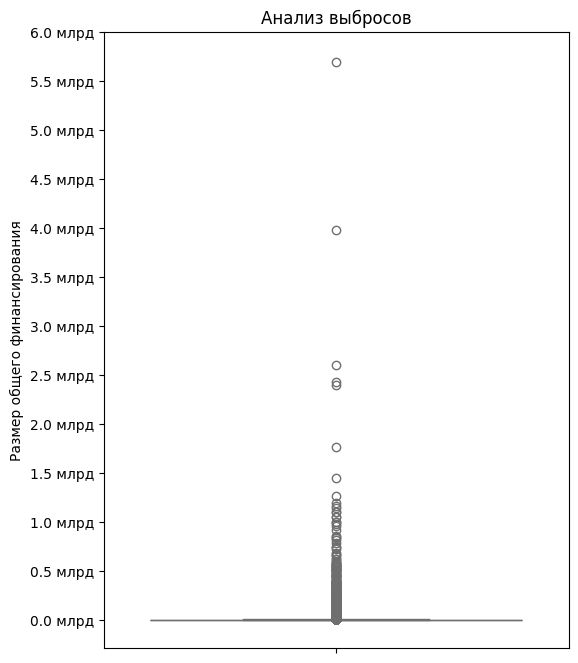

In [94]:
# Boxplot с выбросами
plt.figure(figsize=(6, 8))
sns.boxplot(data=new_company_and_rounds, y='funding_total', color='skyblue')
plt.title('Анализ выбросов')
plt.ylabel('Размер общего финансирования')
plt.xlabel('')
y_ticks = [0, 500_000_000, 1_000_000_000, 1_500_000_000, 2_000_000_000, 2_500_000_000, 3_000_000_000,
          3_500_000_000, 4_000_000_000, 4_500_000_000, 5_000_000_000, 5_500_000_000, 6_000_000_000]
plt.yticks(ticks=y_ticks, labels=[f"{float(x/1e9)} млрд" for x in y_ticks])
plt.show()


- Выбросы начинаются от 14.13 млн рублей, и их большая часть сосредоточена в диапазоне до 500 млн рублей. Затем наблюдаются значительные выбросы в диапазоне от 500 млн до ~1.5 млрд рублей.
- Самый большой выброс составляет около 5.7 млрд рублей, что говорит о наличии компаний с экстремально высоким объемом финансирования

**Вывод**

- типичное финансирование для компаний в данном наборе данных составляет около 0.6 млн или 600 000, а аномальными значениями являются суммы, превышающие 14.13 млн.
- большая часть выбросов сосредоточена в диапазоне от 14.13 млн до 500 млн
- самый значительный выброс составляет около 5.7 млрд, что является максимальным значением в наборе данных.


### 3.3. Куплены забесплатно?

* Исследуйте компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.
* Рассчитайте аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажите, каким процентилям границы соответствуют.

---

- Для исследования продажи компаний за ноль или один доллар нам потребуется информация о сумме сделки. Для этого присоединим датасет `df_acquisition` с информацией о покупках одними компаниями других компаний

In [95]:
filtered_company = new_company_and_rounds.merge(df_acquisition, 
                                                      left_on='company_id',
                                                      right_on='acquired_company_id',
                                                      how='left')

In [96]:
filtered_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40890 entries, 0 to 40889
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            40890 non-null  float64       
 1   name                  40890 non-null  object        
 2   category_code         35436 non-null  object        
 3   status                40890 non-null  object        
 4   founded_at            27911 non-null  datetime64[ns]
 5   closed_at             2128 non-null   datetime64[ns]
 6   domain                35883 non-null  object        
 7   network_username      20938 non-null  object        
 8   country_code          34858 non-null  object        
 9   investment_rounds     40890 non-null  float64       
 10  funding_rounds        40890 non-null  float64       
 11  funding_total         40890 non-null  float64       
 12  milestones            40890 non-null  float64       
 13  id              

- отбираем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

In [113]:
# отбираем компании, которые были проданы
filtered_company = filtered_company[filtered_company['status'] == 'acquired'] 

In [115]:
# за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования
filtered_company = filtered_company[((filtered_company['price_amount'] == 0) | (filtered_company['price_amount'] == 1)) &
    (filtered_company['funding_total'] != 0)]
filtered_company = filtered_company.reset_index(drop=True)
filtered_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_id            1618 non-null   float64       
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   float64       
 10  funding_rounds        1618 non-null   float64       
 11  funding_total         1618 non-null   float64       
 12  milestones            1618 non-null   float64       
 13  id                

In [99]:
filtered_company.head(5)

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,10054.0,jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,usa,0.0,7.0,121500000.0,3.0,9288.0,23283.0,10054.0,cash_and_stock,0.0,2013-08-13
1,101312.0,sidetour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,usa,0.0,3.0,4000000.0,2.0,9653.0,11391.0,101312.0,NaN,0.0,2013-09-18
2,101340.0,choicepass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,usa,0.0,1.0,250000.0,1.0,7272.0,1972.0,101340.0,NaN,0.0,2012-06-18
3,10137.0,producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,usa,0.0,3.0,1310000.0,2.0,8254.0,757.0,10137.0,cash_and_stock,0.0,2012-11-05
4,10139.0,tradecard,enterprise,acquired,1999-01-01,NaT,tradecard.com,tradecard,usa,0.0,2.0,44925000.0,1.0,9326.0,44008.0,10139.0,NaN,0.0,2013-04-01


- Посмотрим пропуски 

In [116]:
filtered_company.isna().sum().sort_values(ascending=False) 

closed_at               1605
term_code               1497
network_username         806
founded_at               333
country_code              82
domain                    72
category_code             65
acquired_at                4
company_id                 0
name                       0
status                     0
funding_rounds             0
investment_rounds          0
funding_total              0
milestones                 0
acquiring_company_id       0
id                         0
acquired_company_id        0
price_amount               0
dtype: int64

- Пропуски в столбцах `closed_at` и `term_code` связаны, скорее всего, с особыми условиями сделок: компании, имеющие пропуски в этих столбцах, возможно, участвовали в нетипичных сделках (символическая стоимость, объединение с другой компанием). 
- Если сделка была заключена на особых условиях (без денежной оплаты или с передачей долей), это может означать, что компания продолжила деятельность под новым владельцем. Это объясняет отсутствие информации о дате закрытия и условиях оплаты. 

Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

In [117]:
Q1_f = filtered_company['funding_total'].quantile(0.25)
Q3_f = filtered_company['funding_total'].quantile(0.75)
IQR_f = Q3_f - Q1_f

In [102]:
# Границы выбросов
lower_bound = max(0, Q1_f - 1.5 * IQR_f) # Добавили условие, тк сумма финансирования
#  не может быть меньше 0 это было бы аномалией
upper_bound = Q3_f + 1.5 * IQR_f
print(f'''Нижняя граница выбросов: {lower_bound}''')
print(f'''Верхняя граница выбросов: {upper_bound}''')

Нижняя граница выбросов: 0
Верхняя граница выбросов: 35750000.0


In [103]:
lower_company = (filtered_company['funding_total'] < lower_bound).sum() / len(filtered_company) * 100
upper_company = (filtered_company['funding_total'] > upper_bound).sum() / len(filtered_company) * 100
print(f"Процент компаний с финансированием ниже нижней границы: {lower_company:.2f}%")
print(f"Процент компаний с финансированием выше верхней границы: {upper_company:.2f}%")

Процент компаний с финансированием ниже нижней границы: 0.00%
Процент компаний с финансированием выше верхней границы: 9.09%


In [104]:
lower_percentile = (filtered_company['funding_total'] < lower_bound).sum() / len(filtered_company) * 100
upper_percentile = (filtered_company['funding_total'] < upper_bound).sum() / len(filtered_company) * 100
print(f"Нижняя граница выбросов находится в ~{lower_percentile:.2f} перцентиле")
print(f"Верхняя граница выбросов находится в ~{upper_percentile:.2f} перцентиле")

Нижняя граница выбросов находится в ~0.00 перцентиле
Верхняя граница выбросов находится в ~90.91 перцентиле


#### **Вывод**

Анализ компаний, проданных за символическую сумму:
- Выявлено 1618 компаний, проданных за 0 или 1 доллар при ненулевом общем объеме финансирования.
- Основной причиной таких сделок, вероятно, является объединение с другой компанией.

Границы выбросов:
- Нижняя граница составляет 0, что соответствует 0 процентилю, так как финансирование ниже 0 невозможно.
- Верхняя граница выбросов составила ~35,75 млн, что соответствует верхнему ~90.91 процентилю.
  
Процент компаний за пределами границ:

- Компании с финансированием выше верхней границы составляют ~9.09%.


### 3.4. Цены стартапов по категориям

Категории стартапов с наибольшими ценами и значительным разбросом цен могут быть наиболее привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

* наибольшими ценами;
* наибольшим разбросом цен за стартап.

Объясните, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

In [105]:
pivot_category = new_company_and_rounds.pivot_table(
    index='category_code',
    values='funding_total',
    aggfunc=['median', 'std']
)
pivot_category.columns = ['median', 'std']
median_top = pivot_category.sort_values(by='median', ascending=False)
median_top = median_top.head(3)
std_top = pivot_category.sort_values(by='std', ascending=False)
std_top = std_top.head(3)

Мы выбрали составить топ из 3 значений для наибольшей цены. Начиная со второго места медианное значение цены значительно падает, что указывает на большую разницу между первым и вторым местом. Начиная с 3 места разница между ценами будет становиться все меньше. Поэтому топ-3 позволяет увидеть лидеров по наибольшим стоимостям стартапов. 

Использовалась медиана, так как она дает типичное значение, которое менее подвержено влиянию выбросов.

In [106]:
median_top

,median,std
category_code,,
semiconductor,8100000.0,3.992461e+07
cleantech,6000000.0,9.215550e+07
medical,5400000.0,3.354983e+07


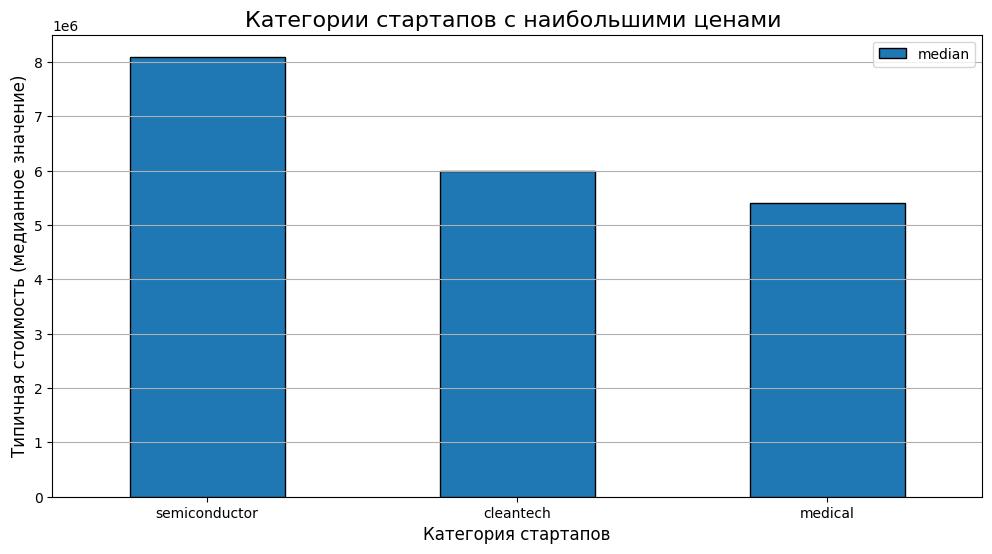

In [107]:
median_top.plot(kind='bar', y='median', figsize=(12, 6), edgecolor='black', rot=0)
plt.title('Категории стартапов с наибольшими ценами ', fontsize=16)
plt.xlabel('Категория стартапов', fontsize=12)
plt.ylabel('Типичная стоимость (медианное значение)', fontsize=12)
plt.grid(axis='y')
plt.show()

- Категория стартапов `semiconductor` занимает первое место по медианной стоимости (8.1 млн). Это указывает на высокий интерес инвесторов к этой категории, вероятно, из-за большого потенциала инноваций, так как полупроводники являются основой для множества современных технологий.

- Категория `cleantech` находится на втором месте с медианной стоимостью 6 млн. 

- Категория `medical` с медианной стоимостью 5.4 млн также входит в топ-3. Это свидетельствует о высоком интересе инвесторов к медицинским инновациям, что может быть связано с постоянно растущим спросом на технологические разработки в сфере здравоохранения.

наибольший разброс цен за стартап

In [108]:
std_top

,median,std
category_code,,
automotive,1300000.0,1.832047e+08
mobile,800000.0,1.459792e+08
social,355000.0,1.114758e+08


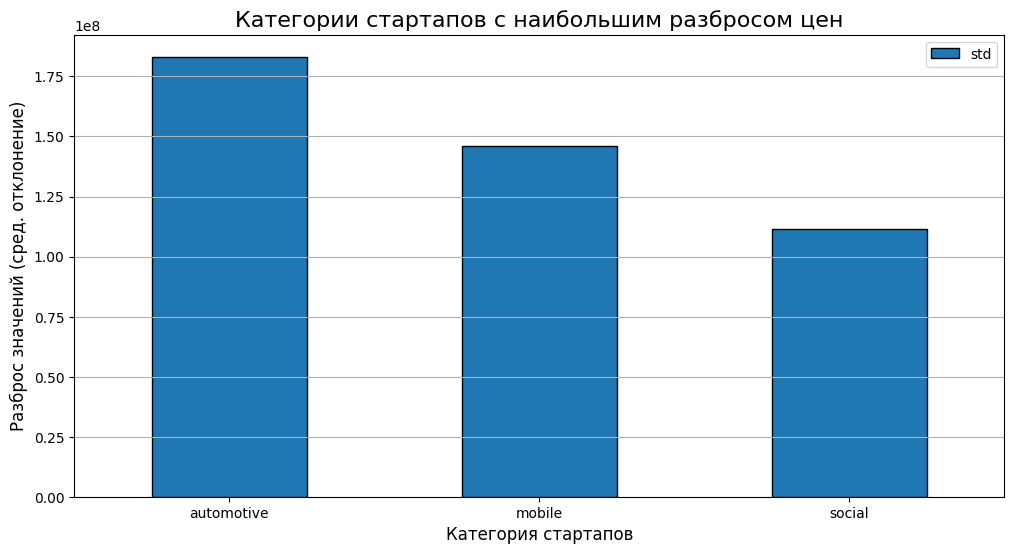

In [109]:
std_top.plot(kind='bar', y='std', figsize=(12, 6), edgecolor='black', rot=0)
plt.title('Категории стартапов с наибольшим разбросом цен', fontsize=16)
plt.xlabel('Категория стартапов', fontsize=12)
plt.ylabel('Разброс значений (сред. отклонение)', fontsize=12)
plt.grid(axis='y')
plt.show()

Среднее отклонение (стандартное отклонение) было выбрано, потому что оно показывает степень разброса значений относительно среднего. Это позволяет оценить, насколько цены внутри каждой категории стартапов варьируются, и определить, в каких категориях наблюдается наиболее значительная изменчивость цен

- Наибольший разброс цен наблюдается в категории `automotive` (183.2 млн), что говорит о значительной разнице в стоимости стартапов. Это может быть связано с высокой конкуренцией и разнообразием компаний в этом сегменте.
- Второе место занимает категория `mobile`, где отклонение равно 145 млн. Это может быть связано с высокими инвестициями в мобильные приложения и технологии, которые часто варьируются по стоимости из-за конкуренции и инноваций в данной области.
- Также высокий разброс цен характерен категории `social`, где среднее отклонение составляет около 111 млн, что показывает значительные колебания в стоимости стартапов, связанных с социальными платформами. Это может быть связано с их разной степенью популярности.

**Вывод**

- Инвесторы, ориентированные на стабильность, скорее всего, будут заинтересованы в категориях с высокими медианными ценами.
- Инвесторы, которые готовы идти на риск, могут сосредоточиться на категориях с большим разбросом цен, чтобы получить возможность значительных доходов.


### 3.5. Сколько раундов продержится стартап перед покупкой

* Необходимо проанализировать столбец `funding_rounds`. Исследуйте значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.

* Постройте график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. Сделайте выводы.

---

- Отфильтруем для задания датасет. Нам нужны компании, которые получали финансирование, то есть у них был хотя бы 1 раунд.

In [110]:
filtered_new_company_and_rounds = new_company_and_rounds[new_company_and_rounds['funding_rounds'] > 0]
filtered_new_company_and_rounds.shape

(31707, 13)

In [111]:
# Группируем данные по статусу и рассчитываем среднее количество раундов финансирования
status_avg_rounds = filtered_new_company_and_rounds.groupby('status')['funding_rounds'].mean()
status_avg_rounds = status_avg_rounds.sort_values(ascending=False)

status_avg_rounds

status
ipo          2.526531
acquired     1.896645
operating    1.642359
closed       1.383437
Name: funding_rounds, dtype: float64

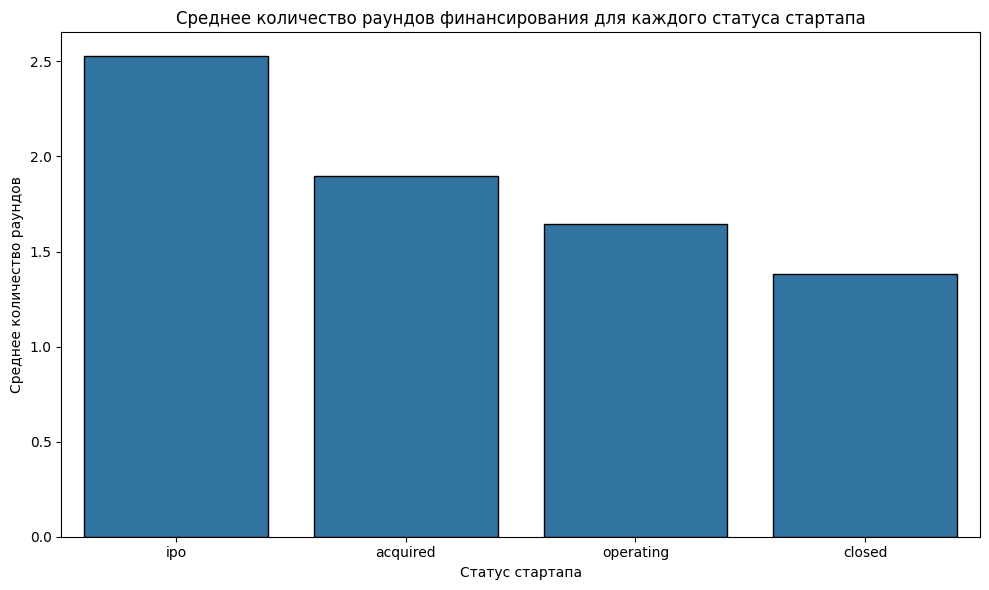

In [112]:
# Построение графика
plt.figure(figsize=(10, 6))
sns.barplot(data=status_avg_rounds, edgecolor='black')
plt.title('Среднее количество раундов финансирования для каждого статуса стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.tight_layout()
plt.show()

**Вывод**
- Стартапы со статусом `IPO` имеют самое высокое среднее количество раундов финансирования. Это может свидетельствовать о том, что для подготовки и выхода на рынок компании требуется привлекать больше финансирования, что делает стадию самой затратной.

- Стартапы, достигшие стадии `acquired`, занимают второе место по количеству раундов. Это говорит о том, что их покупка часто происходит, когда компании уже прошли несколько раундов финансирования.

- Действующие стартапы `operating` занимают третье место по среднему количеству раундов. Это может быть связано с тем, что значительная часть таких компаний находится на ранних стадиях развития и пока не нуждается в большем числе раундов.

- Закрытые стартапы `closed` имеют наименьшее среднее количество раундов. Это может свидетельствовать о том, что такие компании либо испытывали сложности с привлечением финансирования, либо закрывались на ранних стадиях.



**Данные подчеркивают, что статус стартапа играет роль в определении среднего количества раундов финансирования.**




## Шаг 4. Итоговый вывод и рекомендации

В проекте проведен комплексный анализ данных о финансировании стартапов, включая изучение характеристик, связанных с их стоимостью, количеством раундов финансирования и статусами. Основные этапы включали:

1. **Подготовка и очистка данных**
- Загружены и изучены предоставленные датасеты, преобразованы данные с учетом типов (дата и время).
- Выявлены пропуски, большинство из которых вызваны спецификой данных. Пропуски оставлены без изменений, так как они не препятствуют выполнению задач.

2. **Предобработка данных, предварительное исследование**
- Анализ показал, что столбец `network_username` не подходит для объединения данных из-за крайне низкой степени пересечений значений между таблицами. Использование этого столбца в качестве ключа приведет к значительным потерям информации. Предполагается, что `network_username` отражает разные сущности в зависимости от датасета, такие как никнеймы компаний, фондов или сотрудников.
- Датафрейм `company_and_rounds` разделён на два: `df_company_and_rounds` и `df_funding_rounds`.
- Удалены строки с пропусками в критически важных столбцах (`investment_rounds`, `funding_rounds`, `funding_total`, `milestones`) для корректности анализа. Пропуски в столбцах `name` и `status` также устранены, один пропуск в `name` заменён на значение `"неизвестно"`.
- Максимальный типичный размер средств, выделенных в рамках одного раунда, наблюдался в 2005 году. В 2013 году количество раундов финансирования значительно выросло, однако типичный размер средств снизился. Это свидетельствует о перераспределении инвестиций: увеличение числа раундов сопровождалось снижением среднего объёма финансирования на каждый из них.
- Объединение данных из `df_people` и `df_education` позволило создать таблицу, отображающую связь между размером компании и полнотой данных об образовании сотрудников. Анализ показал, что в небольших компаниях доля сотрудников без информации об образовании выше, чем в крупных. Это может быть связано с лучшей организацией и структурированием данных в больших компаниях.
3. **Исследовательский анализ**
- Датафрейм `df_company_and_rounds` был отфильтрован по следующим условиям: `funding_rounds > 0 или investment_rounds > 0 или status = 'acquired'`
- Типичное финансирование для компаний составляет около `0.6` млн (600 000).
- Аномальными значениями считаются суммы, превышающие `14.1` млн.
- Большая часть выбросов сосредоточена в диапазоне от `14.1` млн рублей до `500` млн рублей
- Самый крупный выброс составляет около `5.7 млрд`, что является максимальным значением в данных.
- 1618 компаний были проданы за символическую сумму (0 или 1 доллар) при ненулевом общем объеме финансирования. Возможная причина таких сделок — объединение с другой компанией.
- Категория `semiconductor` лидирует по медианной наибольшей стоимости, за ней следуют `cleantech` и `medical`. Наибольший разброс цен у `automotive`, затем у `mobile` и `social`. Стабильные инвесторы выбирают высокие медианы, рисковые — категории с большим разбросом цен.
- Стартапы со статусом `IPO` проходят больше всего раундов финансирования, что связано с необходимостью значительных инвестиций для выхода на рынок. Приобретённые стартапы `acquired` проходят меньше раундов, так как их покупают на зрелых стадиях. Действующие стартапы `operating` и закрытые `closed` имеют наименьшее число раундов, что связано с ранними стадиями или трудностями в привлечении финансирования. Статус стартапа влияет на количество раундов.

**Рекомендации**

Для инвесторов, которые любят стабильность:

- Можно рассмотреть категории стартапов с высокими медианными ценами (semiconductor, cleantech, medical). Эти категории показывают стабильный средний уровень инвестиций, что снижает риски.

Для инвесторов, готовых к риску:

- Предлагается сосредоточиться на стартапах с высоким разбросом цен (automotive, mobile, social). Эти категории могут предложить возможность значительных доходов при более высоком уровне риска.